# IMPORTANDO Y CARGANDO LAS LIBRERIAS

---





In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#CONFIGURANDO EL DIRECTORIO DE TRABAJO
%cd /content/drive/MyDrive/Data_Science/DataScience/CURSOS/TIMESERIES FORESCASTING/Forecasting Models and Time Series for Business in Python

/content/drive/MyDrive/Data_Science/DataScience/CURSOS/TIMESERIES FORESCASTING/Forecasting Models and Time Series for Business in Python


In [9]:
#IMPORTAMOS LAS LIBRERIAS
import pandas as pd

In [17]:
#OBTENEMOS LOS DATOS
data = pd.read_csv("Daily Bike Sharing.csv", index_col="dteday", parse_dates=True)
data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
#SELECCIONAMOS LAS VARIABLES QUE CREEMOS RELEVANTES PARA NUESTRO MODELO
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]

# TRANSFORMACIÓN DE LOS DATOS

In [12]:
#RENOMBRAMOS LA VARIABLE QUE QUEREMOS PRONOSTICAR
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [13]:
#index
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

In [14]:
#Esto es muy importante, cuando los modelos lean nuestra variable independiete, sabran que hablamos de frecuencia diaria
data = data.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq=None)

# Visualization

<Axes: xlabel='dteday'>

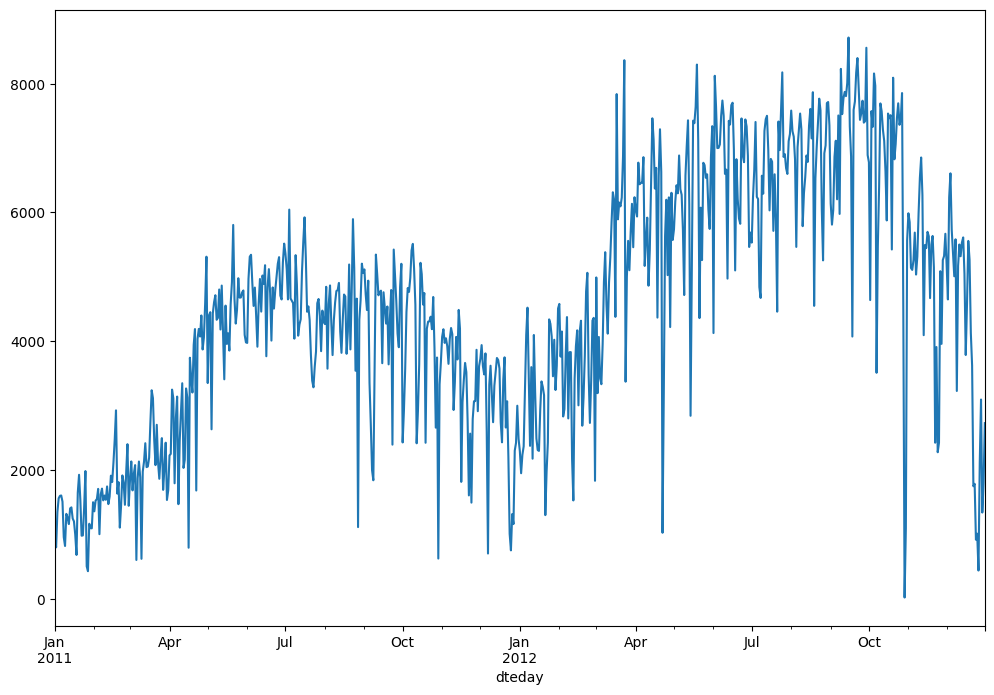

In [16]:
#Visualization
# podemos ver cierta estacionalidad (lo cual es algo que esperariamos en el alquiler de bicicletas), tambien podemos ver cierta tendencia creciente y el valor promedio aumenta con el tiempo.
# Otra cosa que podemos apreciar es la oscilacion tan grande en ciertos dias ej: de 4k a 8k
dataset["y"].plot(figsize = (12,8))